### SRF 단순 연결선물
- open interest를 가장 많이 갖고 있는 월물로 roll over
- 종가를 수정하지 않음 

In [2]:
import sys, os, csv, h5py
sys.path.append('..')
import pandas as pd
import numpy as np

In [3]:
#del sys.modules['tools.instruments']
from tools.instruments import instruments
from tools.constants import SRF_CONTINUOUS_SO_DB_PATH, SRF_ROLLOVER_BO_CSV_PATH
from tools.visualisation import view

### 월물정보 불러오기

In [3]:
method='so' #단순연결 
file = h5py.File(SRF_CONTINUOUS_SO_DB_PATH, 'w')


In [4]:
fields = ['open','high','low','close']
# numpy array datatypes
dtypes= np.dtype([
        ('date', 'i'),
        ('open', 'f'),
        ('high','f'),
        ('low','f'),
        ('close','f'),
        ('volume', 'i'),
        ('open_interest','i')
    ])

for instrument in instruments.values():
    if not instrument.contracts:
        print(f"{instrument.name}은 대상 상품이 아님")
        continue
    print(f"{instrument.name}: {method} 방식으로 연결")
        
    rolls = instrument.rolldates(method = method)
    data = pd.DataFrame()
    for roll in rolls:
        code, start = roll[1], roll[2]
        end = roll[3] if roll[3] else None

        quotes = instrument.quotes(contract=code)[start:end]

        data = pd.concat([data, quotes])
        
    data.reset_index(inplace=True)
    data['date'] = data['date'].values.astype('M8[D]').astype('i')
    data = np.array(list(map(tuple, data.values)), dtypes)
    file.create_dataset(instrument.symbol, data=data)
    
print('DOne')
file.close()

CME Australian Dollar AUD: so 방식으로 연결
SHFE Aluminium은 대상 상품이 아님
ICE Rotterdam Coal은 대상 상품이 아님
ICE Brent Crude Oil은 대상 상품이 아님
CBOT Soybean Oil: so 방식으로 연결
CME British Pound GBP: so 방식으로 연결
CBOT Corn: so 방식으로 연결
ICE Cocoa: so 방식으로 연결
CME Canadian Dollar CAD: so 방식으로 연결
NYMEX WTI Crude Oil: so 방식으로 연결
ICE Cotton: so 방식으로 연결
SHFE Copper은 대상 상품이 아님
CME Class III Milk은 대상 상품이 아님
ICE US Dollar Index: so 방식으로 연결
CME Euro FX: so 방식으로 연결
CME Eurodollar: so 방식으로 연결
CME S&P 500 Index E-Mini: so 방식으로 연결
EUREX Euro-BTP은 대상 상품이 아님
EUREX DAX은 대상 상품이 아님
EUREX EURO STOXX 50 Index은 대상 상품이 아님
CME 30 Day Federal Funds Futures: so 방식으로 연결
EUREX Euro-Bund은 대상 상품이 아님
EUREX Euro-Bobl은 대상 상품이 아님
EUREX Euro-Schatz은 대상 상품이 아님
EUREX Euro-OAT은 대상 상품이 아님
CBOT 5-year US Treasury Note: so 방식으로 연결
ICE Gasoil: so 방식으로 연결
NYMEX Gold: so 방식으로 연결
COMEX Copper: so 방식으로 연결
NYMEX Heating Oil: so 방식으로 연결
LIFFE EURIBOR은 대상 상품이 아님
CME Japanese Yen JPY: so 방식으로 연결
ICE Coffee C: so 방식으로 연결
CME Kansas City Wheat: so 방식으로 연결
LIFFE S

### Dava Verification

In [8]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

In [5]:
symbols = [i.symbol for i in filter(lambda x: x.contracts, instruments.values())]

CBOT Wheat


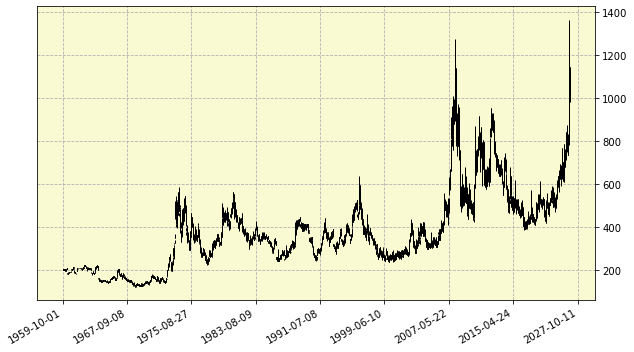

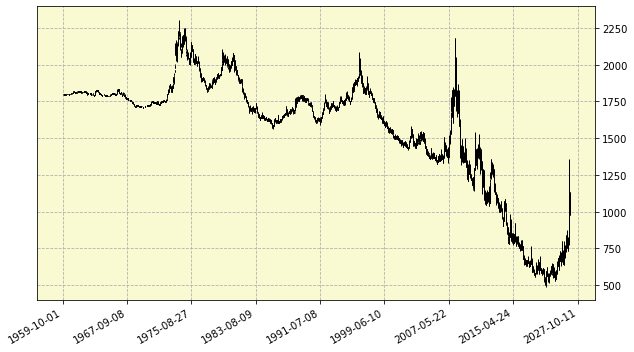

다음으로 가려면 아무키나 누르세요. 끝내려면 (q)


In [12]:
for symbol in symbols:
    print(instruments[symbol].name)
    view(instruments[symbol].quotes(method='so'))
    view(instruments[symbol].quotes(method='bo'))
    plt.show()
    key = input("다음으로 가려면 아무키나 누르세요. 끝내려면 (q)")
    if key == 'q':
        break
    clear_output(wait=True)
